In [4]:
import pandas as pd

In [5]:
!ls

README.txt                  movies.csv
Recommendation system.ipynb ratings.csv
links.csv                   tags.csv


In [6]:
movies = pd.read_csv('movies.csv')

In [7]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
ratings = pd.read_csv('ratings.csv')

In [9]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [10]:
tags = pd.read_csv('tags.csv')

In [11]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [12]:
links = pd.read_csv('links.csv')

In [13]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [14]:
ratings.shape

(100836, 4)

In [15]:
movies.shape

(9742, 3)

In [16]:
#new_df = pd.merge(movies, ratings, on ='movieId')

In [17]:
#new_df = pd.merge(new_df,tags, on ='movieId')

In [18]:
#user1_ratings=new_df.loc[new_df['userId_x']==1]
#user2_ratings=new_df.loc[new_df['userId_x']==2]

In [19]:
#user2_ratings.head()

In [20]:
#user2_fav_movies = user2_ratings.loc[user2_ratings['rating']>3.0]
#user2_dislike_movies = user2_ratings.loc[user2_ratings['rating']<3.0]

In [21]:
#user1_fav_movies = user1_ratings.loc[user1_ratings['rating']>3.0]
#user1_dislike_movies = user1_ratings.loc[user1_ratings['rating']<3.0]

In [22]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [23]:
#movies['num_reviews']=ratings.groupby('movieId').size()

In [24]:
#num_ratings = ratings.groupby('movieId').count()

In [25]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [535]:
movies = pd.merge(movies,num_ratings,on='movieId')

In [536]:
movies = movies.drop(columns=['timestamp','userId'],index=1)

In [537]:
movies =movies.rename(columns={"rating": "num_ratings"})

In [538]:
#movies = movies.sort_values(by='num_ratings',ascending=False)
movies.head()

,movieId,title,genres,num_ratings
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215
2,3,Grumpier Old Men (1995),Comedy|Romance,52
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7
4,5,Father of the Bride Part II (1995),Comedy,49
5,6,Heat (1995),Action|Crime|Thriller,102


Top 5 most reviewed movies

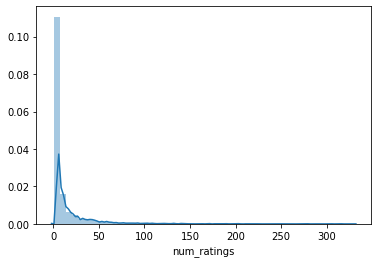

In [382]:
import seaborn as sns
sns.distplot(movies['num_ratings'],hist=True)

Some movies have far more reviews than the others.

## Movie recommendations using pairwise correlation (Using Ratings)

In [383]:
movie_rating_merged = pd.merge(movies,ratings,on='movieId')


In [384]:
user_movie_rating = movie_rating_merged.pivot_table(index='userId', columns='title', values='rating')


In [385]:
user_movie_rating.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [386]:
forrest_gump_ratings = user_movie_rating['Batman (1989)']


In [387]:
movies_like_forest_gump = user_movie_rating.corrwith(forrest_gump_ratings)

corr_forrest_gump = pd.DataFrame(movies_like_forest_gump, columns=['Correlation'])
corr_forrest_gump.dropna(inplace=True)


//anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
//anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [388]:
corr_forrest_gump.sort_values(by='Correlation',ascending=False)[:10]

,Correlation
title,
Snow White and the Huntsman (2012),1.0
Straw Dogs (1971),1.0
Murder on the Orient Express (2017),1.0
Insidious (2010),1.0
"Musketeer, The (2001)",1.0
Passenger 57 (1992),1.0
Paris Is Burning (1990),1.0
Bernie (2011),1.0
The Great Raid (2005),1.0


In [389]:
corr_forrest_gump=pd.merge(movies,corr_forrest_gump,on='title')

In [390]:
corr_forrest_gump.loc[corr_forrest_gump['num_ratings']>25].sort_values(by='Correlation',ascending=False)[1:11]

,movieId,title,genres,num_ratings,Correlation
813,96610,Looper (2012),Action|Crime|Sci-Fi,32,0.867864
601,122886,Star Wars: Episode VII - The Force Awakens (2015),Action|Adventure|Fantasy|Sci-Fi|IMAX,41,0.762052
484,122882,Mad Max: Fury Road (2015),Action|Adventure|Sci-Fi|Thriller,47,0.695477
837,61024,Pineapple Express (2008),Action|Comedy|Crime,31,0.690310
825,5064,The Count of Monte Cristo (2002),Action|Adventure|Drama|Thriller,32,0.675985
911,4232,Spy Kids (2001),Action|Adventure|Children|Comedy,28,0.664120
371,8641,Anchorman: The Legend of Ron Burgundy (2004),Comedy,57,0.645477
1009,2359,Waking Ned Devine (a.k.a. Waking Ned) (1998),Comedy,26,0.630006
869,97921,Silver Linings Playbook (2012),Comedy|Drama,30,0.618629
786,6534,Hulk (2003),Action|Adventure|Sci-Fi,33,0.610814


## Recommendations based on cosine similarity (Using genres)

In [26]:
##When there are multiple genres we want a column for each to denote true or false.
movies = movies.join(movies.genres.str.get_dummies("|"))

In [27]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 23 columns):
movieId               9742 non-null int64
title                 9742 non-null object
genres                9742 non-null object
(no genres listed)    9742 non-null int64
Action                9742 non-null int64
Adventure             9742 non-null int64
Animation             9742 non-null int64
Children              9742 non-null int64
Comedy                9742 non-null int64
Crime                 9742 non-null int64
Documentary           9742 non-null int64
Drama                 9742 non-null int64
Fantasy               9742 non-null int64
Film-Noir             9742 non-null int64
Horror                9742 non-null int64
IMAX                  9742 non-null int64
Musical               9742 non-null int64
Mystery               9742 non-null int64
Romance               9742 non-null int64
Sci-Fi                9742 non-null int64
Thriller              9742 non-null int64
War      

In [28]:
movies.head()

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
from sklearn.metrics.pairwise import cosine_similarity

In [30]:
movies.iloc[:,3:].head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
cos_sim = cosine_similarity(movies.iloc[:,3:])

In [32]:
pd.DataFrame(cos_sim).head()

,0,1,2,3,4,5,6,7,8,9,...,9732,9733,9734,9735,9736,9737,9738,9739,9740,9741
0,1.000000,0.774597,0.316228,0.258199,0.447214,0.0,0.316228,0.632456,0.0,0.258199,...,0.447214,0.316228,0.316228,0.447214,0.0,0.670820,0.774597,0.00000,0.316228,0.447214
1,0.774597,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.816497,0.0,0.333333,...,0.000000,0.000000,0.000000,0.000000,0.0,0.288675,0.333333,0.00000,0.000000,0.000000
2,0.316228,0.000000,1.000000,0.816497,0.707107,0.0,1.000000,0.000000,0.0,0.000000,...,0.353553,0.000000,0.500000,0.000000,0.0,0.353553,0.408248,0.00000,0.000000,0.707107
3,0.258199,0.000000,0.816497,1.000000,0.577350,0.0,0.816497,0.000000,0.0,0.000000,...,0.288675,0.408248,0.816497,0.000000,0.0,0.288675,0.333333,0.57735,0.000000,0.577350
4,0.447214,0.000000,0.707107,0.577350,1.000000,0.0,0.707107,0.000000,0.0,0.000000,...,0.500000,0.000000,0.707107,0.000000,0.0,0.500000,0.577350,0.00000,0.000000,1.000000


In [33]:
import numpy as np
#toystory_top5 = np.argsort(cos_sim[1502])[-10:][::-1]
#toystory_top5=np.argsort(cos_sim[2][1:10])

In [34]:
movies.shape

(9742, 23)

In [35]:
cos_sim.shape

(9742, 9742)

In [36]:
def get_reco(movie_index):
    print("The movie you picked: "+movies.loc[movie_index,['title','genres']])
    print()
    result = (-cos_sim[movie_index]).argsort()[1:10]
    print(movies.loc[result,['title','genres']])
    print()

In [37]:
for i in range(0,150):
    get_reco(i)

title                The movie you picked: Toy Story (1995)
genres    The movie you picked: Adventure|Animation|Chil...
Name: 0, dtype: object

                                                  title  \
6194                                   Wild, The (2006)   
6486                             Shrek the Third (2007)   
9430                                       Moana (2016)   
6948                     Tale of Despereaux, The (2008)   
7760  Asterix and the Vikings (Astérix et les Viking...   
3568                              Monsters, Inc. (2001)   
1706                                        Antz (1998)   
8219                                       Turbo (2013)   
3000                   Emperor's New Groove, The (2000)   

                                           genres  
6194  Adventure|Animation|Children|Comedy|Fantasy  
6486  Adventure|Animation|Children|Comedy|Fantasy  
9430  Adventure|Animation|Children|Comedy|Fantasy  
6948  Adventure|Animation|Children|Comedy|Fantasy  
7760 

                                                  title genres
3911                         Red Beard (Akahige) (1965)  Drama
3924  Songs From the Second Floor (Sånger från andra...  Drama
3934                                  Undisputed (2002)  Drama
7634                             Too Big to Fail (2011)  Drama
7624                                   Beginners (2010)  Drama
1180                       Contempt (Mépris, Le) (1963)  Drama
7611                           Tree of Life, The (2011)  Drama
3982                                  Invincible (2001)  Drama
1198                                Career Girls (1997)  Drama

title     The movie you picked: Postman, The (Postino, I...
genres           The movie you picked: Comedy|Drama|Romance
Name: 52, dtype: object

                                      title                genres
3639                   Majestic, The (2001)  Comedy|Drama|Romance
8764                  Boy Meets Girl (2015)  Comedy|Drama|Romance
5598  Summer's Tale, A (Co

                                                  title genres
3911                         Red Beard (Akahige) (1965)  Drama
3924  Songs From the Second Floor (Sånger från andra...  Drama
3934                                  Undisputed (2002)  Drama
7634                             Too Big to Fail (2011)  Drama
7624                                   Beginners (2010)  Drama
1180                       Contempt (Mépris, Le) (1963)  Drama
7611                           Tree of Life, The (2011)  Drama
3982                                  Invincible (2001)  Drama
1198                                Career Girls (1997)  Drama

title     The movie you picked: Boomerang (1992)
genres      The movie you picked: Comedy|Romance
Name: 106, dtype: object

                                             title          genres
3317                      Coming to America (1988)  Comedy|Romance
3320                      Crossing Delancey (1988)  Comedy|Romance
3343  Night in the Life of Jimmy Reardon, A 

## Using SVD 

In [38]:
from surprise import SVD, accuracy

In [42]:
ratings = ratings.drop(columns='timestamp',index=1)
ratings.head()

,userId,movieId,rating
0,1,1,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
5,1,70,3.0


In [55]:
from surprise import Reader, Dataset
reader = Reader()
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)


In [57]:
from surprise.model_selection import train_test_split

trainset, testset = train_test_split(data, test_size=0.25)

In [59]:
svd = SVD()

In [60]:
svd.fit(trainset)

In [63]:
y_pred = svd.test(testset)

In [65]:
accuracy.rmse(y_pred)

RMSE: 0.8731


0.873051549025127

In [68]:
y_pred[0]

Prediction(uid=141, iid=54286, r_ui=3.5, est=3.6358807597651666, details={'was_impossible': False})

In [115]:
uid = 7
iid = 250
pred = svd.predict(uid, iid, r_ui=4, verbose=True)

user: 7          item: 250        r_ui = 4.00   est = 2.84   {'was_impossible': False}


In [92]:
## Will User 1 like forrest gump?

In [96]:
len(y_pred)

25209

In [161]:
for i in y_pred:
    if i[1]==6 and i[3]>3.8:
        print(i[0])
        print(movies.loc[movies['movieId']==i[0],['title']])

521
                        title
456  Romeo Is Bleeding (1993)
82
                              title
74  Antonia's Line (Antonia) (1995)
469
                                title
407  House of the Spirits, The (1993)
18
                title
17  Four Rooms (1995)
325
                                     title
283  National Lampoon's Senior Trip (1995)
444
                                  title
386  Even Cowgirls Get the Blues (1993)
603
Empty DataFrame
Columns: [title]
Index: []
57
                           title
51  Home for the Holidays (1995)
577
            title
498  Andre (1994)
553
                title
485  Tombstone (1993)
6
         title
5  Heat (1995)
286
Empty DataFrame
Columns: [title]
Index: []
532
                 title
465  Serial Mom (1994)
269
                                   title
231  My Crazy Life (Mi vida loca) (1993)
561
Empty DataFrame
Columns: [title]
Index: []
602
                             title
517  Great Day in Harlem, A (1994)
